In [5]:
import pandas as pd
from pybiomart import Server
import seaborn as sns
import numpy as np
import itertools
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/tylermatheny/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

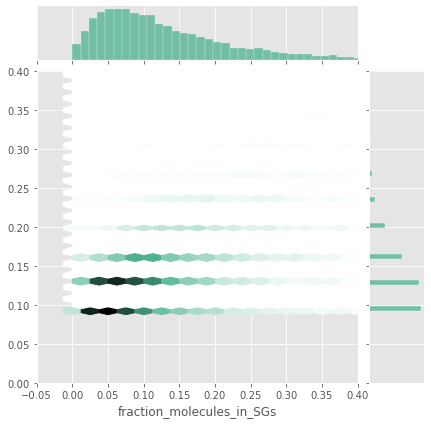

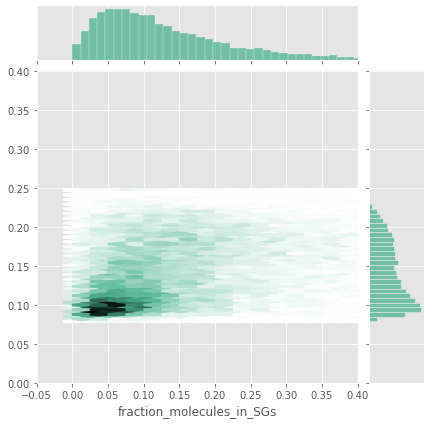

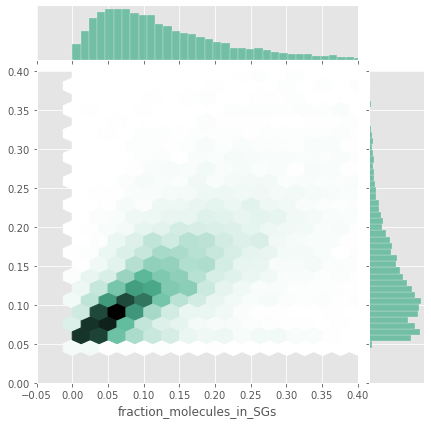

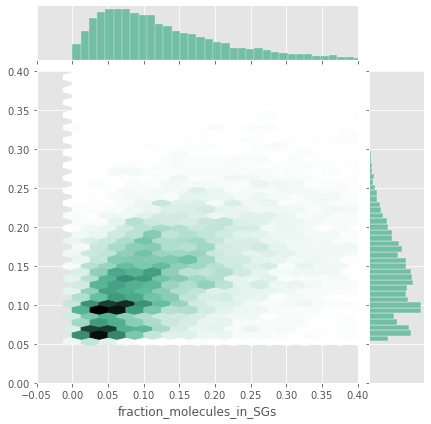

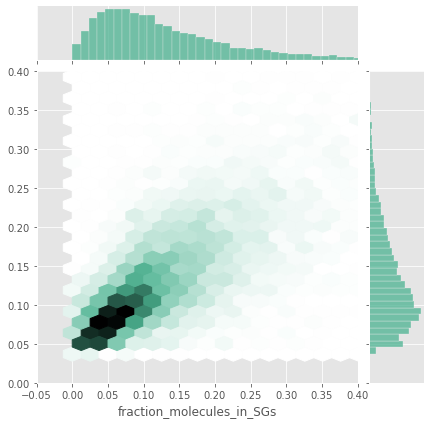

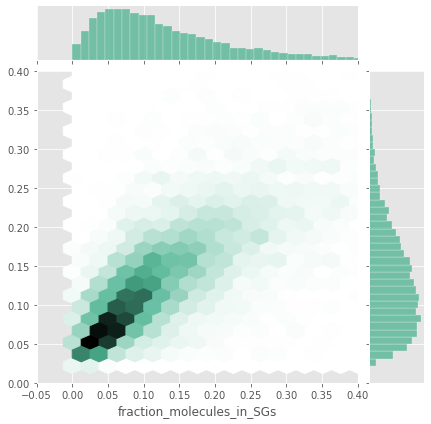

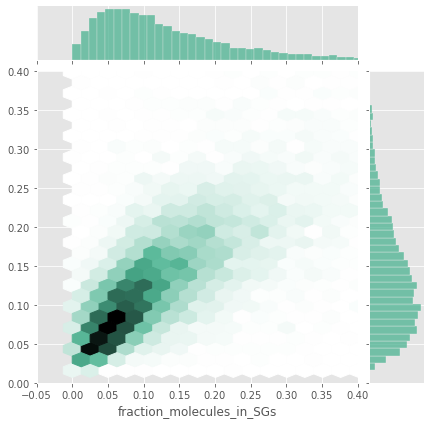

In [62]:
# performs multiple linear regression analysis for every cobination of length, number of m6a sites,
#and m6a ratio vs. fraction of molecules within SGs.
df = pd.read_csv('Supplementary_Table_S1.csv')
df = df[[ 'm6a_sites', 'm6a_ratio', 'Transcript length (including UTRs and CDS)', 'fraction_molecules_in_SGs']]
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna() 
y = df['fraction_molecules_in_SGs']
data = df[['m6a_sites', 'm6a_ratio', 'Transcript length (including UTRs and CDS)']]
data = data.rename(columns={'Transcript length (including UTRs and CDS)':'length'})
subsets = []
for L in range(0, len(data.columns)+1):
    for subset in itertools.combinations(list(data.columns), L):
        subsets.append(list(subset))

subsets.pop(0)

subset_scores = []
for subset in subsets:
    X = data[subset]
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    yhat = regr.predict(X)
    score = regr.score(X, y)
    joint_kws=dict(gridsize=50)
    plot = sns.jointplot(y, yhat, kind="hex",color="#4CB391", joint_kws=joint_kws)
    plot.ax_marg_x.set_xlim(-0.05, .4)
    plot.ax_marg_y.set_ylim(0, .4)
    subset_scores.append((subset,score))
   

The following code block bplots R2 scores for charts generated above

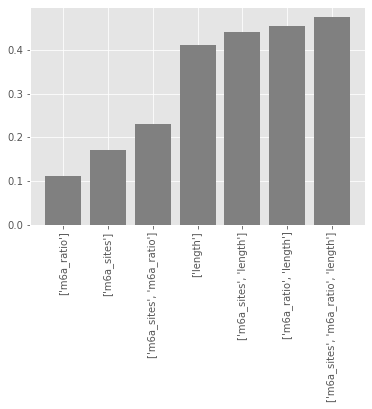

In [51]:
plt.style.use('ggplot')
subset_scores.sort(key = lambda x: x[1])
conditions = [str(x[0]) for x in subset_scores]
scores = [x[1] for x in subset_scores]
ax = plt.bar(x = conditions
                  , height = scores, color='gray')
plt.xticks(rotation=90)


Finally, we simulate transcripts of varying lengths and number of m6a modifications and see how the predicted fraction of transcripts within SGs changes as a function of these two variables

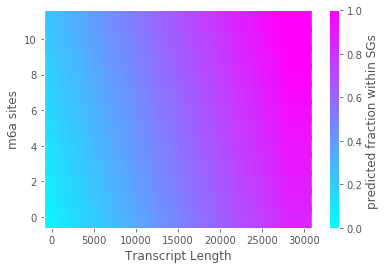

In [61]:
X = data[['length', 'm6a_sites']]
regr = linear_model.LinearRegression()
regr.fit(X, y)
yhat = regr.predict(X)
score = regr.score(X, y)

graph = [(x,y) for x in range(500,30000,500) for y in np.arange(0,12,1)]
ynew = regr.predict(graph)
ax = plt.scatter(pd.DataFrame(graph)[0], pd.DataFrame(graph)[1], c=ynew, cmap= 'cool',marker='s', s=500,vmin=0, vmax=1)
cbar = plt.colorbar(ax)
plt.xlabel('Transcript Length')
plt.ylabel('m6a sites')
cbar.set_label('predicted fraction within SGs ')

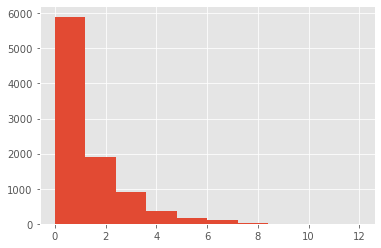

In [58]:
#Histogram of number of transcripts containing varying numbers of m6a sites
df['m6a_sites'].hist()

Text(0, 0.5, 'predicted fraction molecules within SGs')

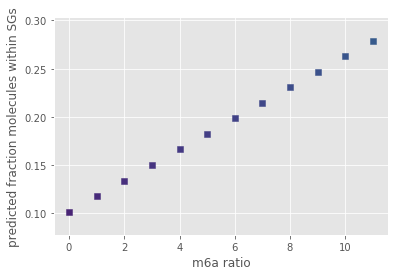

In [60]:
#scatterplot precting SG enrichment as a function of number of m6a sites for a 2.5kb RNA 
graph = [(x,y) for x in range(2500,2501) for y in np.arange(0,12,1)]
ynew = regr.predict(graph)
x = [x for x in np.arange(0,12,1)]
ax = plt.scatter(x, ynew, c=ynew,marker='s',vmin=0, vmax=1)
plt.xlabel('m6a ratio')
plt.ylabel('predicted fraction molecules within SGs')